# Distribución Gaussiana multivariada

## Simulación

Si $\;\boldsymbol{y}=\mathbf{W}\boldsymbol{x}+\boldsymbol{\mu}$ es una afinidad de $\;\boldsymbol{x}\sim\mathcal{N}(\boldsymbol{0}, \mathbf{I}_D)$, entonces $\;\boldsymbol{y}\sim\mathcal{N}(\boldsymbol{\mu}, \mathbf{\Sigma})$ con $\;\mathbf{\Sigma}=\mathbf{W}\mathbf{W}^t$. Por tanto, simular una Gaussiana general se reduce a simular una Gaussiana estándar y aplicar una afinidad. La simulación de una Gaussiana (multivariada) estándar es fácil ya que basta generar números aleatorios Gaussianos estándar. Así pues, si solo tenemos $\;\mathbf{\Sigma}$, tan solo resta hallar su raiz $\mathbf{W}$ mediante, por ejemplo, su descomposición propia
$$\mathbf{\Sigma}=\mathbf{U}\boldsymbol{\Lambda}\mathbf{U}^t%
\quad\to\quad%
\mathbf{\Sigma}=\mathbf{W}\mathbf{W}^t%
\;\text{con}\;%
\mathbf{W}=\mathbf{U}\boldsymbol{\Lambda}^{1/2}$$
y simular la Gaussiana general con
$$\boldsymbol{y}=\boldsymbol{\mu}+\mathbf{U}\mathbf{\Lambda}^{1/2}\boldsymbol{x}$$


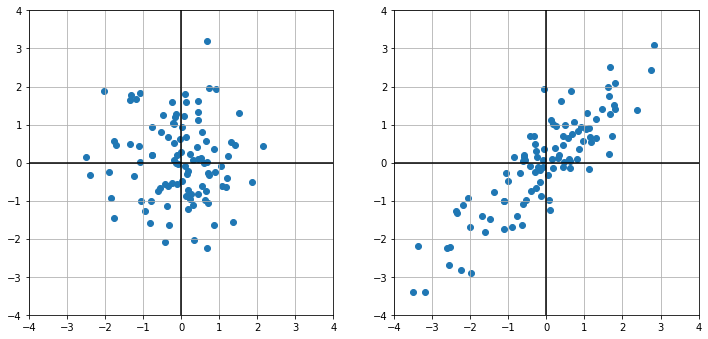

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

np.random.seed(23)
mu = np.array([.0, .0])
I = np.array([[1., .0], [.0, 1.]])
S = np.array([[2., 1.8], [1.8, 2.]])
La, U = np.linalg.eigh(S)
i = La.argsort()[::-1]; La = La[i]; U = U[:,i]
W = U @ np.diag(np.sqrt(La))
X = multivariate_normal(cov=I).rvs(100)
Y = X @ W.T + mu
x_min = y_min = -4.0
x_max = y_max = 4.0
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max))
axes[0].grid(); axes[0].axhline(0, color='black'); axes[0].axvline(0, color='black')
axes[0].scatter(X[:,0], X[:,1])
axes[1].set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max))
axes[1].grid(); axes[1].axhline(0, color='black'); axes[1].axvline(0, color='black')
axes[1].scatter(Y[:,0], Y[:,1]);